In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
import talib as ta
import seaborn as sns
import datetime as dt
import sys
#import finta
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report





In [4]:
# Download historical data for ticker AAPL
aapl_df = yf.download('AAPL', start="2021-06-08", end="2023-06-08")

# Check the data
aapl_df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-01  177.699997  180.119995  176.929993  180.089996  180.089996   
2023-06-02  181.029999  181.779999  179.259995  180.949997  180.949997   
2023-06-05  182.630005  184.949997  178.039993  179.580002  179.580002   
2023-06-06  179.970001  180.119995  177.429993  179.210007  179.210007   
2023-06-07  178.440002  181.210007  177.320007  177.820007  177.820007   

               Volume  
Date                   
2023-06-01   68901800  
2023-06-02   61945900  
2023-06-05  121946500  
2023-06-06   64848400  
2023-06-07   61944600

In [5]:
# Create a line plot with close prices
close_price_plot = aapl_df.hvplot.line(
    x="Date",
    y="Close",
    title="AAple Stock Closing Prices from June 08 2021 to june 08 2023"
)
close_price_plot

:Curve   [Date]   (Close)

In [10]:
close_df = pd.DataFrame({'Close': aapl_df['Close']})
#print(close_df)

In [11]:
# Add the trade_type column to track buys and sells
close_df["trade_type"] = np.nan

# Initialize a cost/proceeds column for recording trade metrics
close_df["cost/proceeds"] = np.nan

In [13]:
# Initialize share size and accumulated shares
share_size = 100
accumulated_shares = 0

In [14]:
# Initialize variable to hold previous day's trading price
# Set the initial value of the previous_price to 0
previous_price = 0

In [16]:
# Loop through the Pandas DataFrame and initiate a trade at each iteration
for index, row in close_df.iterrows():
    # ... existing code ...
    # Calculate the cost/proceeds
    cost_proceeds = row["Close"] * share_size

    # Round the cost/proceeds to two decimal places
    rounded_cost_proceeds = round(cost_proceeds, 2)

    # Assign the rounded value back to the DataFrame
    close_df.loc[index, "cost/proceeds"] = rounded_cost_proceeds
close_df.tail()

Close trade_type  cost/proceeds
Date                                            
2023-06-01  180.089996       hold        18009.0
2023-06-02  180.949997       hold        18095.0
2023-06-05  179.580002        buy        17958.0
2023-06-06  179.210007        buy        17921.0
2023-06-07  177.820007        buy        17782.0

In [18]:
#Calculate the total profit/loss for 100 share size orders
#Print the profit/loss metrics
# Specify the buy and sell dates
buy_date = '2021-06-08'  # Replace with your desired buy date
sell_date = '2023-06-07'  # Replace with your desired sell date

# Define share size
share_size = 100

# Filter the DataFrame for the specified buy and sell dates
trade_df = close_df.loc[buy_date:sell_date]

# Calculate the profit or loss per share
buy_price = trade_df.iloc[0]["Close"]
sell_price = trade_df.iloc[-1]["Close"]
profit_loss_per_share = sell_price - buy_price

# Calculate the total profit or loss
shares_bought = share_size
total_profit_loss = profit_loss_per_share * shares_bought

# Print the result
print(f"Profit/Loss per Share: ${profit_loss_per_share:.2f}")
print(f"Total Profit/Loss: ${total_profit_loss:.2f}")


Profit/Loss per Share: $51.08
Total Profit/Loss: $5108.00


In [32]:
#Specify the buy date
buy_date = '2021-06-08' # Replace with your desired buy date

#Retrieve the close price on the buy date
buy_price = close_df.loc[buy_date, 'Close']

#Print the buy price
print(f"Buy Price on {buy_date}: ${buy_price:.2f}")

#Specify the sell date
sell_date = '2023-06-07' # Replace with your desired sell date

#Retrieve the close price on the sell date
sell_price = close_df.loc[sell_date, 'Close']

#Print the sell price
print(f"Sell Price on {sell_date}: ${sell_price:.2f}")

#Specify the buy date, buy price, sell date, sell price, and share size¶
buy_date = '2021-06-08' # Replace with your desired buy date buy_price = 130.50 # Replace with the specific buy price sell_date = '2023-06-07' # Replace with your desired sell date sell_price = 180.25 # Replace with the specific sell price share_size = 100 # Replace with the number of shares bought

#Calculate the profit or loss per share
profit_loss_per_share = sell_price - buy_price

#Calculate the total profit or loss
total_profit_loss = profit_loss_per_share * share_size

# Print the result
print(f"Profit/Loss per Share: {profit_loss_per_share:.2f}")
print(f"Total Profit/Loss: {total_profit_loss:.2f}")

# Calculate the return on investment (ROI)
roi = (total_profit_loss / total_investment) * 100

# Print the results
print(f"Return on Investment (ROI): {roi:.2f}%")

Buy Price on 2021-06-08: $126.74
Sell Price on 2023-06-07: $177.82
Profit/Loss per Share: 51.08
Total Profit/Loss: 5108.00
Return on Investment (ROI): 39.14%


In [28]:
# Specify the current date, current price, and buy price
current_date = '2023-06-07'  # Replace with the current date
current_price = 180.25  # Replace with the current price
buy_price = 130.50  # Replace with your buy price

# Define your strategy criteria
threshold_profit = 10  # Replace with your desired profit threshold
threshold_loss = -5  # Replace with your desired loss threshold

# Calculate the profit or loss
profit_loss = current_price - buy_price

# Determine the action based on the strategy
if profit_loss >= threshold_profit:
    action = "Sell"
elif profit_loss <= threshold_loss:
    action = "Sell"
else:
    action = "Hold"

# Print the result
print(f"Action on {current_date}: {action}")


Action on 2023-06-07: Sell


PART TWO ~ Indicators


[*********************100%***********************]  1 of 1 completed
Intersection Points with MACD and MACD signal :
     Intersect
0  2021-08-31
1  2021-10-14
2  2021-11-17
3  2022-02-01
4  2022-03-18
5  2022-05-27
6  2022-06-23
7  2022-10-17
8  2022-11-11
9  2023-01-09
10 2023-03-16
11 2023-04-19
12 2023-05-01
13 2023-05-05
14 2023-05-19
15 2023-05-31


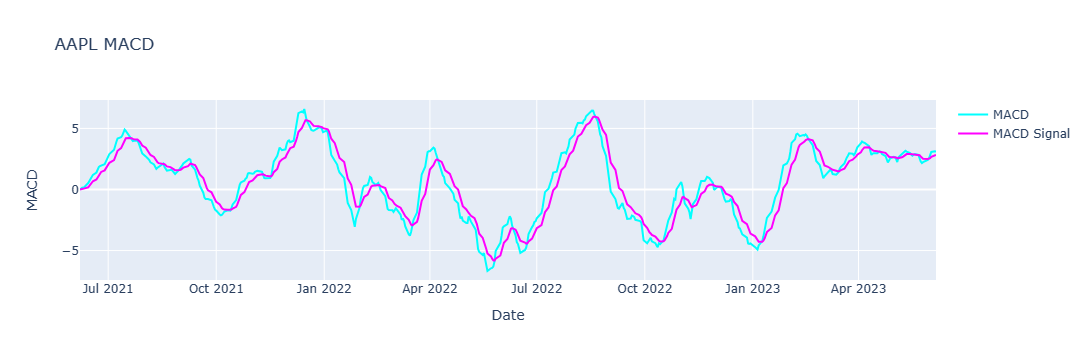

In [36]:
# Function to Plot MACD and Locate Intersections
def plot_MACD(stock_symbol):
    # Download historical data for the specified stock symbol
    df = yf.download(stock_symbol, start="2021-06-07", end="2023-06-07")

    # Compute MACD
    def compute_macd(data, short=12, long=26):
        short_ema = data.ewm(span=short, adjust=False).mean()
        long_ema = data.ewm(span=long, adjust=False).mean()
        macd = short_ema - long_ema
        signal = macd.ewm(span=9, adjust=False).mean()
        return macd, signal

    # Compute MACD and MACD Signal
    macd, macd_signal = compute_macd(df['Close'])

    # Create traces for MACD and MACD Signal
    trace_macd = go.Scatter(x=df.index, y=macd, line={'color': 'cyan'}, name='MACD')
    trace_macd_signal = go.Scatter(x=df.index, y=macd_signal, line={'color': 'magenta'}, name='MACD Signal')

    # Create the figure
    fig2 = go.Figure()
    fig2.add_trace(trace_macd)
    fig2.add_trace(trace_macd_signal)

    # Set the title and axis labels directly in the trace objects
    fig2.update_layout(
        title=f'{stock_symbol} MACD',
        xaxis_title='Date',
        yaxis_title='MACD',
        showlegend=True
    )

    # Find the points where MACD and MACD Signal lines intersect
    intersections = []
    for i in range(1, len(macd)):
        if (macd[i - 1] < macd_signal[i - 1]) and (macd[i] > macd_signal[i]):
            intersections.append(df.index[i])

    # Create a dataframe to store the intersection points
    df_intersections_macd_macd_signal = pd.DataFrame(intersections, columns=['Intersect'])

    print("Intersection Points with MACD and MACD signal :\n", df_intersections_macd_macd_signal)
    # Show the figure and return the intersection dataframe
    fig2.show()

# Call the function and provide a stock symbol to plot the MACD
plot_MACD("AAPL")


[*********************100%***********************]  1 of 1 completed
Intersection Points with Bollinger Bands (std dev = 1):
           Date       Price
0   2022-03-21  165.380005
1   2022-04-08  170.089996
2   2022-04-11  165.750000
3   2022-04-12  167.660004
4   2022-04-13  170.399994
..         ...         ...
154 2023-03-17  155.000000
155 2023-03-20  157.399994
156 2023-03-22  157.830002
157 2023-03-27  158.279999
158 2023-03-28  157.649994

[159 rows x 2 columns]
Intersection Points with Bollinger Bands (std dev = 4):
           Date       Price
0   2022-03-21  165.380005
1   2022-03-22  168.820007
2   2022-03-23  170.210007
3   2022-03-24  174.070007
4   2022-03-25  174.720001
..         ...         ...
300 2023-05-31  177.250000
301 2023-06-01  180.089996
302 2023-06-02  180.949997
303 2023-06-05  179.580002
304 2023-06-06  179.210007

[305 rows x 2 columns]
Intersection Points with SMA 9 and SMA 21:
         Date       Price
0 2022-02-15  172.789993
1 2022-05-04  166.020004
2 

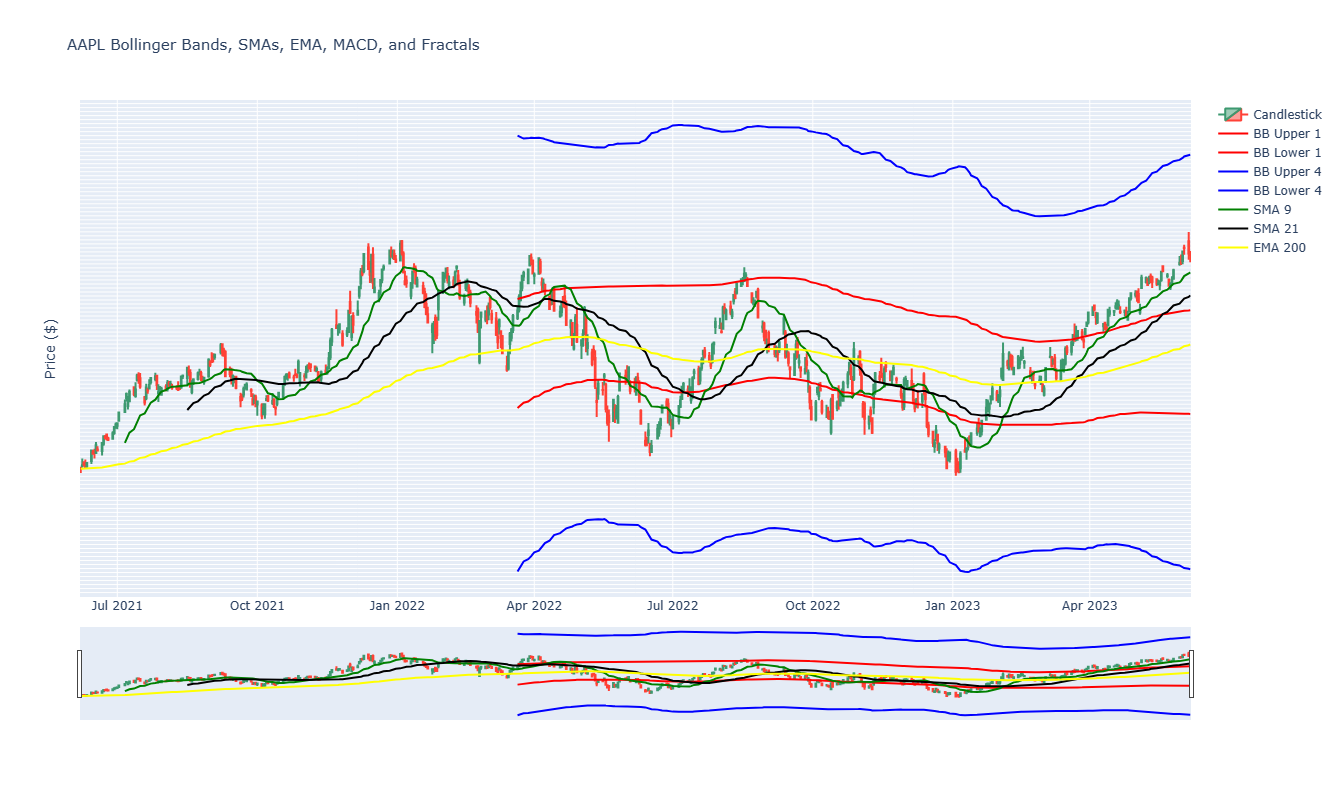

In [66]:
# Function to Plot Bollinger Bands, SMA and EMA and Locate Intersections
def plot_bollinger_bands(stock_symbol):
    # Download historical data for the specified stock symbol
    df = yf.download(stock_symbol, start="2021-06-07", end="2023-06-07")
    
    # Define Bollinger Bands function
    def bollinger_bands(data, n, std, col='Close'):
        MA = data[col].rolling(window=n).mean()
        SD = data[col].rolling(window=n).std()
        data['BB_Upper'] = MA + (std * SD)
        data['BB_Lower'] = MA - (std * SD)
        return data
    
    # Calculate Williams Fractals
    def compute_fractals(data, period=2):
        high_fractal = data['High'].rolling(window=2*period+1, center=True).max()
        low_fractal = data['Low'].rolling(window=2*period+1, center=True).min()
        data['Fractal_Bull'] = data['High'] >= high_fractal
        data['Fractal_Bear'] = data['Low'] <= low_fractal
        return data
    
    # Compute Bollinger Bands with std dev of 1 and 4
    df = bollinger_bands(df, n=200, std=1)
    df.rename(columns={'BB_Upper': 'BB_Upper1', 'BB_Lower': 'BB_Lower1'}, inplace=True)
    df = bollinger_bands(df, n=200, std=4)
    df.rename(columns={'BB_Upper': 'BB_Upper4', 'BB_Lower': 'BB_Lower4'}, inplace=True)
    
    # Compute SMAs
    df['SMA_9'] = df['Close'].rolling(window=21).mean()
    df['SMA_21'] = df['Close'].rolling(window=50).mean()  # Fixed parentheses
    
    # Compute EMA
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()
    
    # Compute Williams Fractals
    df = compute_fractals(df, period=2)
    
    # Create a Candlestick chart
    trace_candle = go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'], name='Candlestick')
    
    # Create traces for Bollinger Bands, SMAs, EMA
    trace_bb_upper1 = go.Scatter(x=df.index, y=df['BB_Upper1'], line={'color': 'red'}, name='BB Upper 1')
    trace_bb_lower1 = go.Scatter(x=df.index, y=df['BB_Lower1'], line={'color': 'red'}, name='BB Lower 1')
    trace_bb_upper4 = go.Scatter(x=df.index, y=df['BB_Upper4'], line={'color': 'blue'}, name='BB Upper 4')
    trace_bb_lower4 = go.Scatter(x=df.index, y=df['BB_Lower4'], line={'color': 'blue'}, name='BB Lower 4')
    trace_sma_9 = go.Scatter(x=df.index, y=df['SMA_9'], line={'color': 'green'}, name='SMA 9')
    trace_sma_21 = go.Scatter(x=df.index, y=df['SMA_21'], line={'color': 'black'}, name='SMA 21')
    trace_ema_200 = go.Scatter(x=df.index, y=df['EMA_200'], line={'color': 'yellow'}, name='EMA 200')
    
    # Identify points where the candlestick intersects with Bollinger Bands (std dev = 1)
    intersections_bb1 = []
    for i in range(len(df)):
        close_price = df['Close'][i]
        bb_upper1 = df['BB_Upper1'][i]
        bb_lower1 = df['BB_Lower1'][i]
        if bb_lower1 <= close_price <= bb_upper1:
            intersections_bb1.append((df.index[i], close_price))
    
    # Convert intersection points to DataFrame
    df_intersections_bb1 = pd.DataFrame(intersections_bb1, columns=['Date', 'Price'])
    
    # Identify points where the candlestick intersects with Bollinger Bands (std dev = 4)
    intersections_bb4 = []
    for i in range(len(df)):
        close_price = df['Close'][i]
        bb_upper4 = df['BB_Upper4'][i]
        bb_lower4 = df['BB_Lower4'][i]
        if bb_lower4 <= close_price <= bb_upper4:
            intersections_bb4.append((df.index[i], close_price))
    
    # Convert intersection points to DataFrame
    df_intersections_bb4 = pd.DataFrame(intersections_bb4, columns=['Date', 'Price'])
    
    # Identify points where SMA_9 intersects with SMA_21
    intersections_sma9_sma21 = []
    for i in range(1, len(df)):
        close_price = df['Close'][i]
        prev_close_price = df['Close'][i - 1]
        sma9 = df['SMA_9'][i]
        prev_sma9 = df['SMA_9'][i - 1]
        sma21 = df['SMA_21'][i]
        prev_sma21 = df['SMA_21'][i - 1]
        if (
            prev_close_price <= prev_sma9 and close_price > sma9 and
            prev_close_price <= prev_sma21 and close_price > sma21
        ):
            intersections_sma9_sma21.append((df.index[i], close_price))
    
    # Convert intersection points to DataFrame
    df_intersections_sma9_sma21 = pd.DataFrame(intersections_sma9_sma21, columns=['Date', 'Price'])
    
    print("Intersection Points with Bollinger Bands (std dev = 1):\n", df_intersections_bb1)
    print("Intersection Points with Bollinger Bands (std dev = 4):\n", df_intersections_bb4)
    print("Intersection Points with SMA 9 and SMA 21:\n", df_intersections_sma9_sma21)
    
    # Create a layout
    layout = go.Layout(
        title={
            'text': f'{stock_symbol} Bollinger Bands, SMAs, EMA, MACD, and Fractals',
            'font': {
                'size': 15
            }
        },
        yaxis={
            'title': 'Price ($)',
            'tick0': 0,
            'dtick': 1,
            'showticklabels': False
        },
        autosize=False,
        width=1200,
        height=800,
    )
    
    # Construct the figure
    fig = go.Figure(
        data=[trace_candle, trace_bb_upper1, trace_bb_lower1, trace_bb_upper4, trace_bb_lower4,
              trace_sma_9, trace_sma_21, trace_ema_200],
        layout=layout
    )
    
    # Plot the figure
    fig.show()
    
# Call the function and provide a stock symbol to plot the Bands
plot_bollinger_bands('AAPL')


[*********************100%***********************]  1 of 1 completed
Intersection Points with Bollinger Bands (std dev = 1):
           Date       Price
0   2022-03-21  165.380005
1   2022-04-08  170.089996
2   2022-04-11  165.750000
3   2022-04-12  167.660004
4   2022-04-13  170.399994
..         ...         ...
154 2023-03-17  155.000000
155 2023-03-20  157.399994
156 2023-03-22  157.830002
157 2023-03-27  158.279999
158 2023-03-28  157.649994

[159 rows x 2 columns]
Intersection Points with Bollinger Bands (std dev = 4):
           Date       Price
0   2022-03-21  165.380005
1   2022-03-22  168.820007
2   2022-03-23  170.210007
3   2022-03-24  174.070007
4   2022-03-25  174.720001
..         ...         ...
300 2023-05-31  177.250000
301 2023-06-01  180.089996
302 2023-06-02  180.949997
303 2023-06-05  179.580002
304 2023-06-06  179.210007

[305 rows x 2 columns]
Intersection Points with SMA 9:
          Date       Price
0  2021-08-03  147.360001
1  2021-08-12  148.889999
2  2021-08

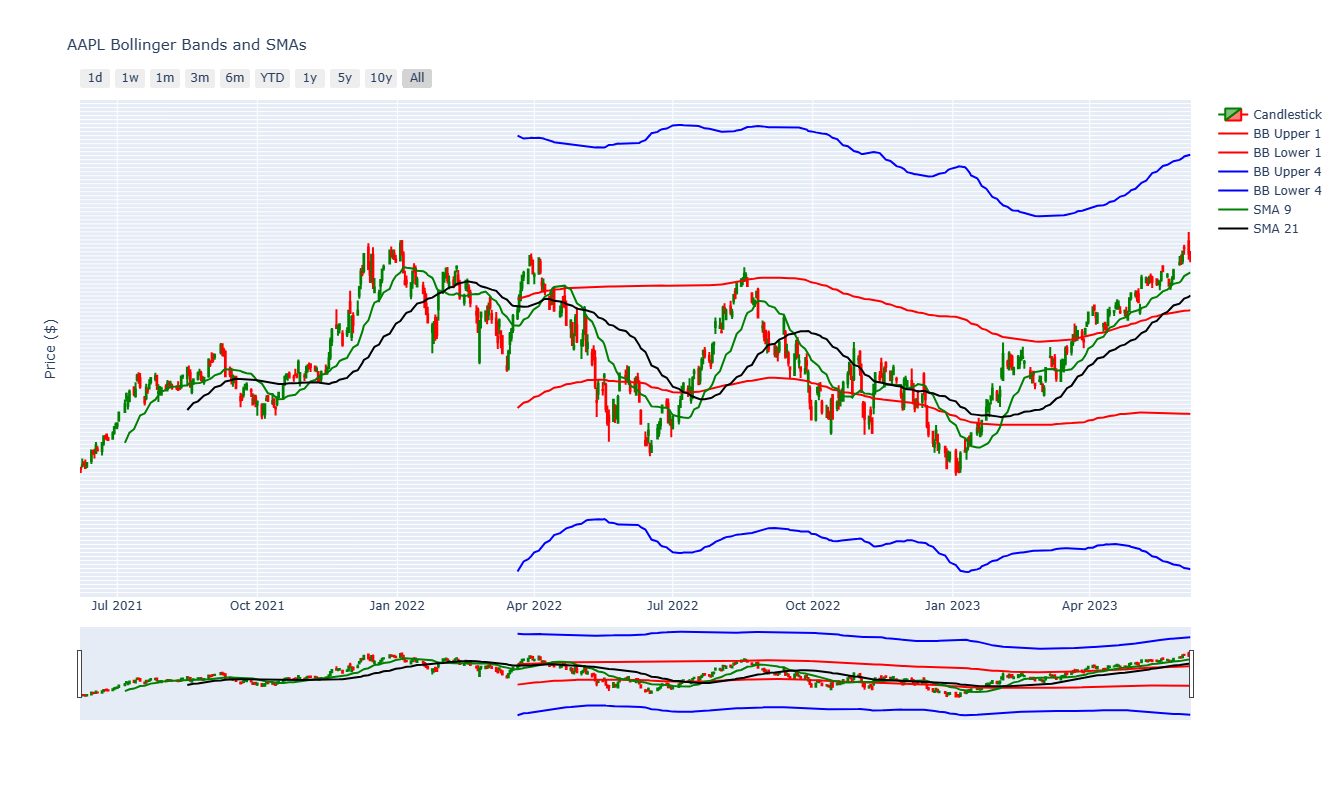

In [65]:

def plot_bollinger_bands(stock_symbol):
    # Download historical data for the specified stock symbol
    df = yf.download(stock_symbol, start="2021-06-07", end="2023-06-07")

    # Define Bollinger Bands function
    def bollinger_bands(data, n, std, col='Close'):
        MA = data[col].rolling(window=n).mean()
        SD = data[col].rolling(window=n).std()
        data['BB_Upper'] = MA + (std * SD)
        data['BB_Lower'] = MA - (std * SD)
        return data

    # Compute Bollinger Bands with std dev of 1 and 4
    df = bollinger_bands(df, n=200, std=1)
    df.rename(columns={'BB_Upper': 'BB_Upper1', 'BB_Lower': 'BB_Lower1'}, inplace=True)
    df = bollinger_bands(df, n=200, std=4)
    df.rename(columns={'BB_Upper': 'BB_Upper4', 'BB_Lower': 'BB_Lower4'}, inplace=True)

    # Compute SMAs
    df['SMA_9'] = df['Close'].rolling(window=21).mean()
    df['SMA_21'] = df['Close'].rolling(window=50).mean()

    # Create a Candlestick trace
    trace_candle = go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'], name='Candlestick',
        increasing={'line': {'color': 'green'}},
        decreasing={'line': {'color': 'red'}}
    )

    # Create traces for Bollinger Bands and SMAs
    trace_bb_upper1 = go.Scatter(x=df.index, y=df['BB_Upper1'], line={'color': 'red'}, name='BB Upper 1')
    trace_bb_lower1 = go.Scatter(x=df.index, y=df['BB_Lower1'], line={'color': 'red'}, name='BB Lower 1')
    trace_bb_upper4 = go.Scatter(x=df.index, y=df['BB_Upper4'], line={'color': 'blue'}, name='BB Upper 4')
    trace_bb_lower4 = go.Scatter(x=df.index, y=df['BB_Lower4'], line={'color': 'blue'}, name='BB Lower 4')
    trace_sma_9 = go.Scatter(x=df.index, y=df['SMA_9'], line={'color': 'green'}, name='SMA 9')
    trace_sma_21 = go.Scatter(x=df.index, y=df['SMA_21'], line={'color': 'black'}, name='SMA 21')

    # Identify points where the candlestick intersects with Bollinger Bands (std dev = 1)
    intersections_bb1 = []
    for i in range(len(df)):
        close_price = df['Close'][i]
        bb_upper1 = df['BB_Upper1'][i]
        bb_lower1 = df['BB_Lower1'][i]
        if bb_lower1 <= close_price <= bb_upper1:
            intersections_bb1.append((df.index[i], close_price))

    # Convert intersection points to DataFrame
    df_intersections_bb1 = pd.DataFrame(intersections_bb1, columns=['Date', 'Price'])

    # Identify points where the candlestick intersects with Bollinger Bands (std dev = 4)
    intersections_bb4 = []
    for i in range(len(df)):
        close_price = df['Close'][i]
        bb_upper4 = df['BB_Upper4'][i]
        bb_lower4 = df['BB_Lower4'][i]
        if bb_lower4 <= close_price <= bb_upper4:
            intersections_bb4.append((df.index[i], close_price))

    # Convert intersection points to DataFrame
    df_intersections_bb4 = pd.DataFrame(intersections_bb4, columns=['Date', 'Price'])

    # Identify points where the candlestick intersects with SMA_9
    intersections_sma9 = []
    for i in range(1, len(df)):
        close_price = df['Close'][i]
        prev_close_price = df['Close'][i-1]
        sma9 = df['SMA_9'][i]
        prev_sma9 = df['SMA_9'][i-1]
        if prev_close_price <= prev_sma9 and close_price > sma9:
            intersections_sma9.append((df.index[i], close_price))

    # Convert intersection points to DataFrame
    df_intersections_sma9 = pd.DataFrame(intersections_sma9, columns=['Date', 'Price'])

    # Identify points where the candlestick intersects with SMA_21
    intersections_sma21 = []
    for i in range(1, len(df)):
        close_price = df['Close'][i]
        prev_close_price = df['Close'][i-1]
        sma21 = df['SMA_21'][i]
        prev_sma21 = df['SMA_21'][i-1]
        if prev_close_price <= prev_sma21 and close_price > sma21:
            intersections_sma21.append((df.index[i], close_price))

    # Convert intersection points to DataFrame
    df_intersections_sma21 = pd.DataFrame(intersections_sma21, columns=['Date', 'Price'])

    print("Intersection Points with Bollinger Bands (std dev = 1):\n", df_intersections_bb1)
    print("Intersection Points with Bollinger Bands (std dev = 4):\n", df_intersections_bb4)
    print("Intersection Points with SMA 9:\n", df_intersections_sma9)
    print("Intersection Points with SMA 21:\n", df_intersections_sma21)

    layout = go.Layout(
        title={
            'text': f'{stock_symbol} Bollinger Bands and SMAs',
            'font': {
                'size': 15
            }
        },
        yaxis={
            'title': 'Price ($)',
            'showticklabels': False,
            'dtick': 1,  # Specify the desired increment for the y-axis tick marks
        },
        autosize=False,
        width=1000,
        height=800,
        xaxis={
            'rangeslider': {
                'visible': True
            },
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1d', 'step': 'day', 'stepmode': 'backward'},
                    {'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 3, 'label': '3m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': 'YTD', 'step': 'year', 'stepmode': 'todate'},
                    {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                    {'count': 5, 'label': '5y', 'step': 'year', 'stepmode': 'backward'},
                    {'count': 10, 'label': '10y', 'step': 'year', 'stepmode': 'backward'},
                    {'label': 'All', 'step': 'all'}]
            },
            'type': 'date'
        }
    )

    fig = go.Figure(data=[trace_candle, trace_bb_upper1, trace_bb_lower1, trace_bb_upper4, trace_bb_lower4,
                          trace_sma_9, trace_sma_21], layout=layout)

    fig.show()

plot_bollinger_bands('AAPL')


In [60]:
# Visualize entry position relative to close price
entry = aapl_df[aapl_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = aapl_df[aapl_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = aapl_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = aapl_df[["Short", "Long"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot


:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

[*********************100%***********************]  1 of 1 completed


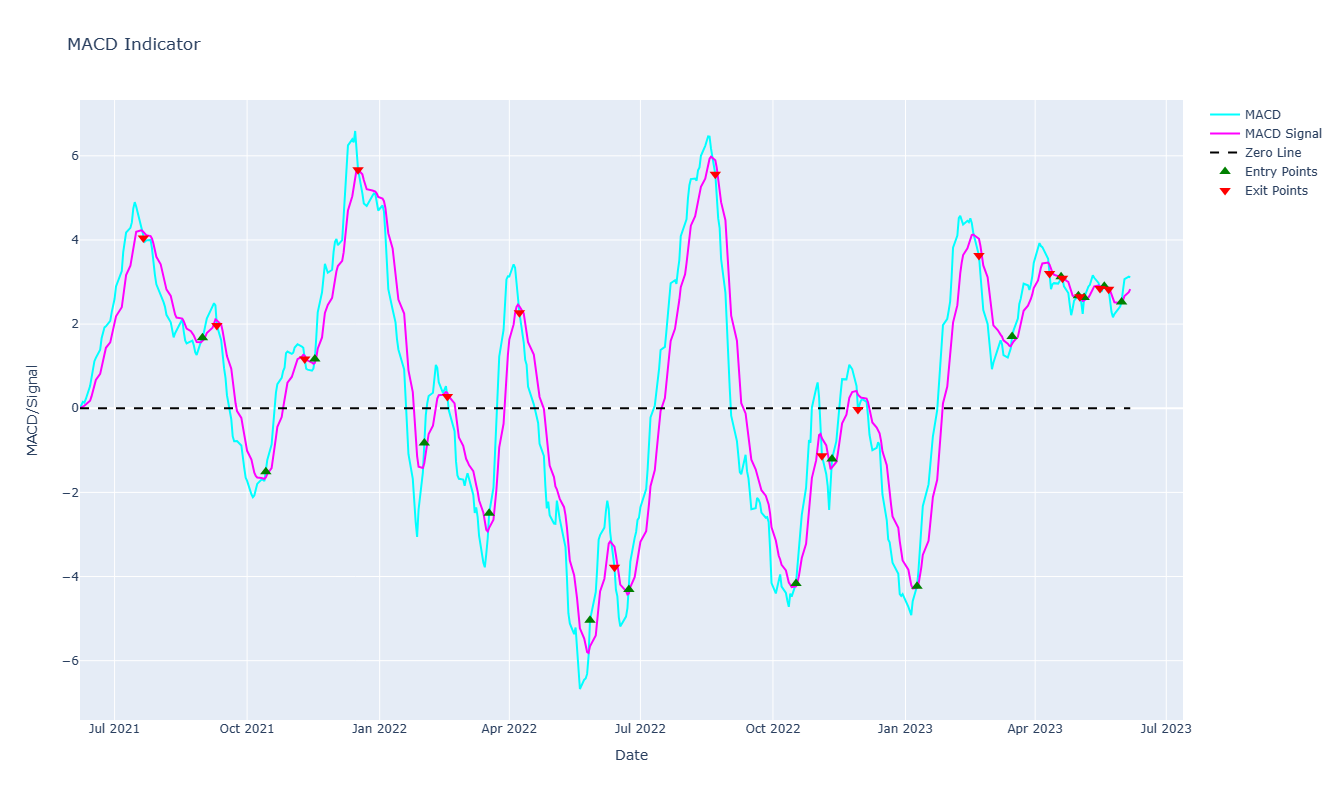

In [64]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Function to Plot MACD and Locate Intersections
def plot_MACD(stock_symbol):
    # Download historical data for the specified stock symbol
    df = yf.download(stock_symbol, start="2021-06-07", end="2023-06-07")

    # Compute MACD
    def compute_macd(data, short=12, long=26):
        short_ema = data.ewm(span=short, adjust=False).mean()
        long_ema = data.ewm(span=long, adjust=False).mean()
        macd = short_ema - long_ema
        signal = macd.ewm(span=9, adjust=False).mean()
        return macd, signal

    # Compute MACD and MACD Signal
    macd, macd_signal = compute_macd(df['Close'])

    # Create traces for MACD, MACD Signal, and zero line
    trace_macd = go.Scatter(x=df.index, y=macd, line={'color': 'cyan'}, name='MACD')
    trace_macd_signal = go.Scatter(x=df.index, y=macd_signal, line={'color': 'magenta'}, name='MACD Signal')
    trace_zero_line = go.Scatter(x=df.index, y=[0] * len(df), line={'color': 'black', 'dash': 'dash'}, name='Zero Line')
    
    # Determine entry and exit points
    entry_points = []
    exit_points = []

    for i in range(1, len(macd)):
        if macd[i-1] < macd_signal[i-1] and macd[i] > macd_signal[i]:
            entry_points.append((df.index[i], macd[i]))
        elif macd[i-1] > macd_signal[i-1] and macd[i] < macd_signal[i]:
            exit_points.append((df.index[i], macd[i]))

    # Create layout
    layout = go.Layout(
        title="MACD Indicator",
        xaxis=dict(title="Date"),
        yaxis=dict(title="MACD/Signal"),
        width=1200,
        height=800)

    # Create figure and add traces
    fig = go.Figure(data=[trace_macd, trace_macd_signal, trace_zero_line], layout=layout)

    # Add markers for entry points
    fig.add_trace(go.Scatter(
        x=[entry[0] for entry in entry_points],
        y=[entry[1] for entry in entry_points],
        mode='markers',
        marker=dict(symbol='triangle-up', size=10, color='green'),
        name='Entry Points'
    ))

    # Add markers for exit points
    fig.add_trace(go.Scatter(
        x=[exit[0] for exit in exit_points],
        y=[exit[1] for exit in exit_points],
        mode='markers',
        marker=dict(symbol='triangle-down', size=10, color='red'),
        name='Exit Points'
    ))

    # Show the figure
    fig.show()

# Call the function with a stock symbol (e.g., AAPL for Apple Inc.)
plot_MACD('AAPL')


PART THREE CREATE TARGET SET

In [72]:
#aapl_df

In [75]:
aapl_df['Close_pct_change'] = aapl_df['Close'].pct_change() * 100
aapl_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-08  126.599998  128.460007  126.209999  126.739998  125.271996   
2021-06-09  127.209999  127.750000  126.519997  127.129997  125.657471   
2021-06-10  127.019997  128.190002  125.940002  126.110001  124.649292   
2021-06-11  126.529999  127.440002  126.099998  127.349998  125.874916   
2021-06-14  127.820000  130.539993  127.070000  130.479996  128.968643   

              Volume  Signal  Short  Long  Entry/Exit  signal  \
Date                                                            
2021-06-08  74403800     0.0    NaN   NaN         NaN     0.0   
2021-06-09  56877900     0.0    NaN   NaN         0.0     0.0   
2021-06-10  71186400     0.0    NaN   NaN         0.0     0.0   
2021-06-11  53522400     0.0    NaN   NaN         0.0     0.0   
2021-06-14  96906500     0.0    NaN   NaN         0.0     0.0   

            Close_pct_change  
Date                          
2021-06-08               NaN  
2021-06-09          0.307716  
2021-06-10         -0.802326  
2021-06-11          0.983267  
2021-06-14          2.457791

In [67]:
# Create a new column in the trading_df called signal setting its value to zero.
aapl_df["signal"] = 0.0

In [80]:
# Assuming you have a feature matrix X and target variable y in your DataFrame
X = aapl_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = aapl_df['Signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
# Fit the LogisticRegression model:
# Create an instance of LogisticRegression
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train_scaled, y_train)



LogisticRegression()

In [85]:
#Predict the trading signals for the training data:
y_train_pred = logistic_regression.predict(X_train_scaled)


In [88]:
#Evaluate the model using classification_report:
classification_report_train = classification_report(y_train, y_train_pred)
print("Classification Report (Training Data):")
print(classification_report_train)


Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       299
         1.0       0.57      0.22      0.31        79

    accuracy                           0.80       378
   macro avg       0.69      0.59      0.60       378
weighted avg       0.77      0.80      0.76       378



Precision: Precision is the ability of the model to correctly identify positive instances. A precision of 0.82 for the "0.0" class means that out of all the instances predicted as "0.0", 82% were actually "0.0". Similarly, a precision of 0.57 for the "1.0" class means that out of all the instances predicted as "1.0", 57% were actually "1.0".

Recall: Recall, also known as sensitivity or true positive rate, is the ability of the model to correctly identify positive instances out of all the actual positive instances. A recall of 0.96 for the "0.0" class means that the model identified 96% of all the actual "0.0" instances correctly. A recall of 0.22 for the "1.0" class means that the model identified only 22% of all the actual "1.0" instances correctly.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. The F1-score ranges from 0 to 1, with a higher value indicating better performance. In this case, the F1-score is 0.88 for the "0.0" class and 0.31 for the "1.0" class.

Support: Support represents the number of instances in each class. In this case, there are 299 instances of class "0.0" and 79 instances of class "1.0" in the training data.

Accuracy: Accuracy is the overall correctness of the model's predictions, calculated as the ratio of correctly predicted instances to the total number of instances. In this case, the model achieved an accuracy of 0.80, indicating that 80% of the instances in the training data were predicted correctly.

Macro Avg and Weighted Avg: These are the average scores calculated for all the classes. Macro Avg calculates the unweighted mean of the metrics, giving equal importance to each class. Weighted Avg calculates the weighted mean of the metrics based on the support of each class, giving higher importance to classes with more instances.

Based on this classification report, we can see that the model performs better in predicting class "0.0" (non-trading signal) with higher precision, recall, and F1-score compared to class "1.0" (trading signal). However, the overall accuracy of the model on the training data is 0.80, suggesting that there is room for improvement in predicting both classes.


In [89]:
#Backtest the LogisticRegression model:
# Predict the trading signals for the testing data
y_test_pred = logistic_regression.predict(X_test_scaled)

# Evaluate the model using classification_report for testing data
classification_report_test = classification_report(y_test, y_test_pred)
print("Classification Report (Testing Data):")
print(classification_report_test)


Classification Report (Testing Data):
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91        99
         1.0       0.82      0.33      0.47        27

    accuracy                           0.84       126
   macro avg       0.83      0.66      0.69       126
weighted avg       0.84      0.84      0.81       126



In [94]:
# Split the data into training and testing datasets
training_begin = X.index.min()
training_end = X.index.min() + pd.DateOffset(months=3)
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]



In [95]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)